In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf

In [2]:
!mkdir -p /root/.kaggle

In [3]:
import shutil

shutil.move("kaggle.json", "/root/.kaggle/")

'/root/.kaggle/kaggle.json'

In [4]:
!chmod 600 /root/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d muratkokludataset/grapevine-leaves-image-dataset

Dataset URL: https://www.kaggle.com/datasets/muratkokludataset/grapevine-leaves-image-dataset
License(s): CC0-1.0


In [6]:
import zipfile
zip_ref = zipfile.ZipFile('/content/grapevine-leaves-image-dataset.zip')
zip_ref.extractall()
zip_ref.close()

In [7]:
!ls Grapevine_Leaves_Image_Dataset

Ak  Ala_Idris  Buzgulu	Dimnit	Grapevine_Leaves_Image_Dataset_Citation_Request.txt  Nazli


In [8]:
import os

for dirpath, dirnames, filenames in os.walk('Grapevine_Leaves_Image_Dataset'):
  print(f'There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}.')

There are 5 directories and 1 images in Grapevine_Leaves_Image_Dataset.
There are 0 directories and 100 images in Grapevine_Leaves_Image_Dataset/Nazli.
There are 0 directories and 100 images in Grapevine_Leaves_Image_Dataset/Ak.
There are 0 directories and 100 images in Grapevine_Leaves_Image_Dataset/Dimnit.
There are 0 directories and 100 images in Grapevine_Leaves_Image_Dataset/Ala_Idris.
There are 0 directories and 100 images in Grapevine_Leaves_Image_Dataset/Buzgulu.


In [9]:
for i in os.walk('Grapevine_Leaves_Image_Dataset'):
  print(i)

('Grapevine_Leaves_Image_Dataset', ['Nazli', 'Ak', 'Dimnit', 'Ala_Idris', 'Buzgulu'], ['Grapevine_Leaves_Image_Dataset_Citation_Request.txt'])
('Grapevine_Leaves_Image_Dataset/Nazli', [], ['Nazli (29).png', 'Nazli (69).png', 'Nazli (39).png', 'Nazli (13).png', 'Nazli (17).png', 'Nazli (99).png', 'Nazli (88).png', 'Nazli (37).png', 'Nazli (77).png', 'Nazli (70).png', 'Nazli (97).png', 'Nazli (50).png', 'Nazli (21).png', 'Nazli (79).png', 'Nazli (90).png', 'Nazli (11).png', 'Nazli (36).png', 'Nazli (89).png', 'Nazli (68).png', 'Nazli (26).png', 'Nazli (49).png', 'Nazli (22).png', 'Nazli (96).png', 'Nazli (94).png', 'Nazli (18).png', 'Nazli (32).png', 'Nazli (80).png', 'Nazli (82).png', 'Nazli (31).png', 'Nazli (4).png', 'Nazli (74).png', 'Nazli (12).png', 'Nazli (10).png', 'Nazli (72).png', 'Nazli (61).png', 'Nazli (91).png', 'Nazli (25).png', 'Nazli (64).png', 'Nazli (1).png', 'Nazli (87).png', 'Nazli (15).png', 'Nazli (53).png', 'Nazli (58).png', 'Nazli (65).png', 'Nazli (76).png', 'Na

In [10]:
import random

def view_random_image(target_dir,target_class):
  target_folder = target_dir + target_class
  random_img = random.sample(os.listdir(target_folder), 1)
  img = mpimg.imread(target_folder + '/' + random_img[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off')

  print(f'Image shape: {img.shape}')
  return img

Image shape: (511, 511, 4)


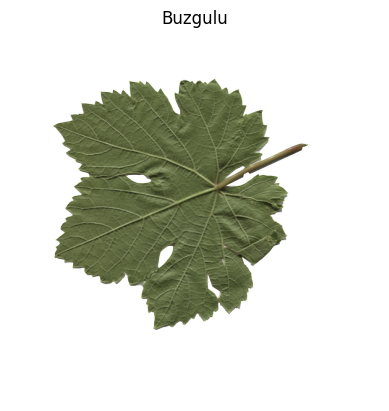

In [11]:
img = view_random_image(target_dir='/content/Grapevine_Leaves_Image_Dataset/',target_class='Buzgulu')

In [12]:
img/255

array([[[0.00392157, 0.00392157, 0.00392157, 0.        ],
        [0.00392157, 0.00392157, 0.00392157, 0.        ],
        [0.00392157, 0.00392157, 0.00392157, 0.        ],
        ...,
        [0.00392157, 0.00392157, 0.00392157, 0.        ],
        [0.00392157, 0.00392157, 0.00392157, 0.        ],
        [0.00392157, 0.00392157, 0.00392157, 0.        ]],

       [[0.00392157, 0.00392157, 0.00392157, 0.        ],
        [0.00392157, 0.00392157, 0.00392157, 0.        ],
        [0.00392157, 0.00392157, 0.00392157, 0.        ],
        ...,
        [0.00392157, 0.00392157, 0.00392157, 0.        ],
        [0.00392157, 0.00392157, 0.00392157, 0.        ],
        [0.00392157, 0.00392157, 0.00392157, 0.        ]],

       [[0.00392157, 0.00392157, 0.00392157, 0.        ],
        [0.00392157, 0.00392157, 0.00392157, 0.        ],
        [0.00392157, 0.00392157, 0.00392157, 0.        ],
        ...,
        [0.00392157, 0.00392157, 0.00392157, 0.        ],
        [0.00392157, 0.003921

# Fit the model

In [32]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)
train_datagen = ImageDataGenerator(rescale=1./255,validation_split=0.2)
test_datagen = ImageDataGenerator(rescale=1./255,validation_split=0.2)

dir = '/content/Grapevine_Leaves_Image_Dataset'

In [35]:
train_data = train_datagen.flow_from_directory(directory=dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode='categorical',
                                               shuffle=True,
                                               subset='training',
                                               seed=42)

test_data = test_datagen.flow_from_directory(directory=dir,
                                          target_size=(224,224),
                                          batch_size=32,
                                          class_mode='categorical',
                                          shuffle=True,
                                          subset='validation',
                                          seed=42)

Found 400 images belonging to 5 classes.
Found 100 images belonging to 5 classes.


In [37]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32,
                           kernel_size=3,
                           activation='relu',
                           input_shape=(224, 224, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=2, padding='valid'),
    tf.keras.layers.Conv2D(filters=32,
                           kernel_size=3,
                           activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=2, padding='valid'),
    tf.keras.layers.Conv2D(filters=32,
                           kernel_size=3,
                           activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, padding='valid'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(5, activation='softmax')
])

In [38]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model_1.compile(loss='categorical_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])

In [40]:
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.3290 - loss: 7.1087

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


13/13 ━━━━━━━━━━━━━━━━━━━━ 49s 4s/step - accuracy: 0.3248 - loss: 6.9409 - val_accuracy: 0.2000 - val_loss: 1.6454
Epoch 2/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 81s 4s/step - accuracy: 0.3280 - loss: 1.9027 - val_accuracy: 0.2900 - val_loss: 1.6183
Epoch 3/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 83s 4s/step - accuracy: 0.5244 - loss: 1.1845 - val_accuracy: 0.2100 - val_loss: 1.7423
Epoch 4/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 48s 4s/step - accuracy: 0.6836 - loss: 0.8827 - val_accuracy: 0.2000 - val_loss: 2.0429
Epoch 5/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 45s 3s/step - accuracy: 0.8026 - loss: 0.6002 - val_accuracy: 0.2000 - val_loss: 2.4769


In [41]:
model_1.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 222, 222, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 109, 109, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 109, 109, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 54, 54, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 52, 52, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 26, 26, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 21632)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 21632)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 5)                   │         108,165 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 383,185 (1.46 MB)

 Trainable params: 127,685 (498.77 KB)

 Non-trainable params: 128 (512.00 B)

 Optimizer params: 255,372 (997.55 KB)

In [42]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32,
                           kernel_size=3,
                           activation='relu',
                           input_shape=(224, 224, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(filters=32,
                           kernel_size=3,
                           activation='relu',),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(filters=32,
                           kernel_size=3,
                           activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(5, activation='softmax')
])

optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3)
model_2.compile(loss='categorical_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [43]:
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 51s 4s/step - accuracy: 0.2459 - loss: 4.7077 - val_accuracy: 0.1900 - val_loss: 1.6282
Epoch 2/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 79s 3s/step - accuracy: 0.3478 - loss: 1.7796 - val_accuracy: 0.2300 - val_loss: 1.6296
Epoch 3/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 83s 4s/step - accuracy: 0.4657 - loss: 1.3161 - val_accuracy: 0.2100 - val_loss: 1.6247
Epoch 4/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 45s 3s/step - accuracy: 0.6892 - loss: 0.8455 - val_accuracy: 0.2000 - val_loss: 1.9162
Epoch 5/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 83s 3s/step - accuracy: 0.7045 - loss: 0.6681 - val_accuracy: 0.1900 - val_loss: 2.1792


In [44]:
len(train_data)

13

Image shape: (511, 511, 4)
Image shape: (511, 511, 4)
Image shape: (511, 511, 4)
Image shape: (511, 511, 4)
Image shape: (511, 511, 4)


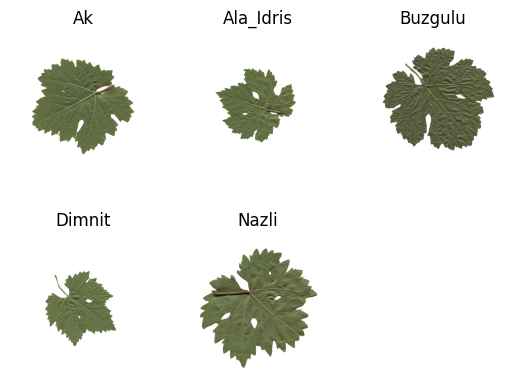

In [45]:
plt.figure()
plt.subplot(2,3,1)
view_random_image('Grapevine_Leaves_Image_Dataset/','Ak');
plt.subplot(2,3,2)
view_random_image('Grapevine_Leaves_Image_Dataset/','Ala_Idris');
plt.subplot(2,3,3)
view_random_image('Grapevine_Leaves_Image_Dataset/','Buzgulu');
plt.subplot(2,3,4)
view_random_image('Grapevine_Leaves_Image_Dataset/','Dimnit');
plt.subplot(2,3,5)
view_random_image('Grapevine_Leaves_Image_Dataset/','Nazli');

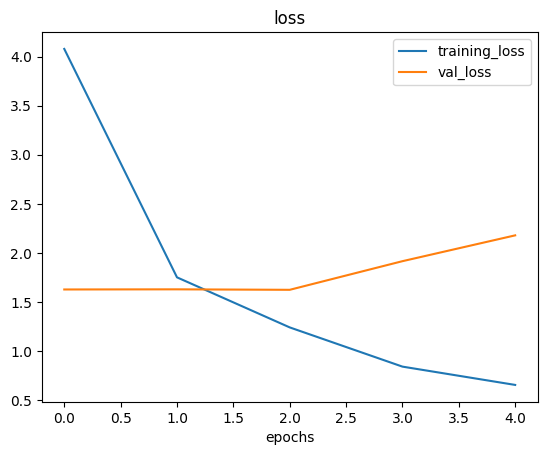

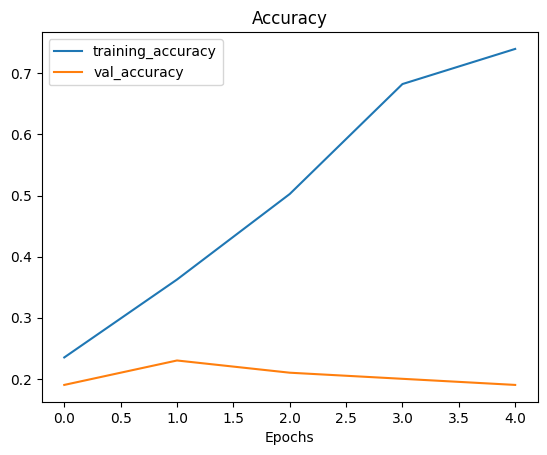

In [46]:
plot_loss_curves(history_2)

# Data Augmentation

In [47]:
# Augmented Dataset
train_datagen_augmented = ImageDataGenerator(rescale=1./255,
                                             rotation_range=1,
                                             shear_range=0.1,
                                             zoom_range=0.1,
                                             width_shift_range=0.1,
                                             height_shift_range=0.1,
                                             horizontal_flip=True,
                                             vertical_flip=True)

# Normal Dataset
train_datagen = ImageDataGenerator(rescale=1./255,validation_split=0.2)
test_datagen = ImageDataGenerator(rescale=1./255)

In [48]:
print('Train data augmented: ')
train_data_augmented = train_datagen_augmented.flow_from_directory(directory=dir,
                                                                   batch_size=32,
                                                                   target_size=(224,224),
                                                                   class_mode='categorical',
                                                                   shuffle=True,
                                                                   seed=42)

print('Non-Augmented data: ')
train_data = train_datagen.flow_from_directory(directory=dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode='categorical',
                                               subset='training',
                                               shuffle=True,
                                               seed=42)

IMG_SIZE = (224,224)
test_data = test_datagen.flow_from_directory(directory=dir,
                                             batch_size=32,
                                             target_size=IMG_SIZE,
                                             class_mode='categorical',
                                             seed=42)

Train data augmented: 
Found 500 images belonging to 5 classes.
Non-Augmented data: 
Found 400 images belonging to 5 classes.
Found 500 images belonging to 5 classes.


In [49]:
images, labels = next(train_data)
augmented_images, augmented_labels = next(train_data_augmented)

(np.float64(-0.5), np.float64(223.5), np.float64(223.5), np.float64(-0.5))

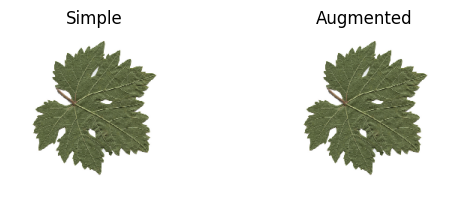

In [50]:
plt.figure()
random_number = np.random.randint(len(augmented_images))

plt.subplot(2,2,1)
plt.imshow(images[random_number])
plt.title('Simple')
plt.axis('off')

plt.subplot(2,2,2)
plt.imshow(images[random_number])
plt.title('Augmented')
plt.axis('off')

In [51]:
model_3 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32,
                           kernel_size=(3, 3),
                           padding='valid',
                           kernel_initializer='he_normal',
                           activation='relu',
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(filters=32,
                           kernel_size=(3, 3),
                           padding='valid',
                           kernel_initializer='he_normal',
                           activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(filters=32,
                           kernel_size=(3, 3),
                           padding='valid',
                           kernel_initializer='he_normal',
                           activation='relu'),
    tf.keras.layers.Conv2D(filters=32,
                           kernel_size=(3, 3),
                           padding='valid',
                           kernel_initializer='he_normal',
                           activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(5, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [52]:
optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3)
model_3.compile(loss='categorical_crossentropy',
               optimizer=optimizer,
               metrics=['accuracy'])

In [53]:
history_3 = model_3.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 118s 7s/step - accuracy: 0.1870 - loss: 11.6389 - val_accuracy: 0.2160 - val_loss: 1.7063
Epoch 2/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 122s 8s/step - accuracy: 0.2009 - loss: 1.6532 - val_accuracy: 0.2000 - val_loss: 1.6063
Epoch 3/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 119s 7s/step - accuracy: 0.2466 - loss: 1.6089 - val_accuracy: 0.2280 - val_loss: 1.5999
Epoch 4/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 109s 7s/step - accuracy: 0.2405 - loss: 1.6108 - val_accuracy: 0.3080 - val_loss: 1.5910
Epoch 5/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 110s 7s/step - accuracy: 0.2043 - loss: 1.6021 - val_accuracy: 0.3100 - val_loss: 1.5760


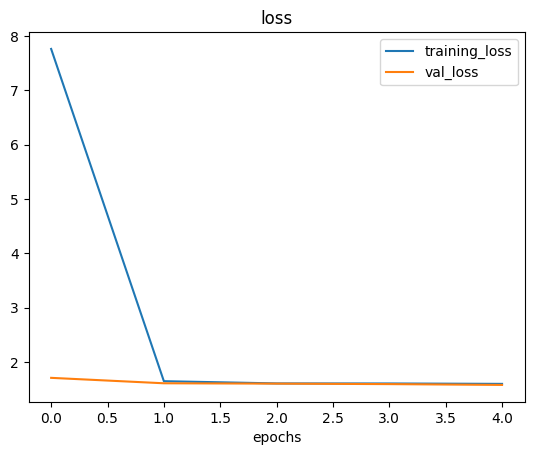

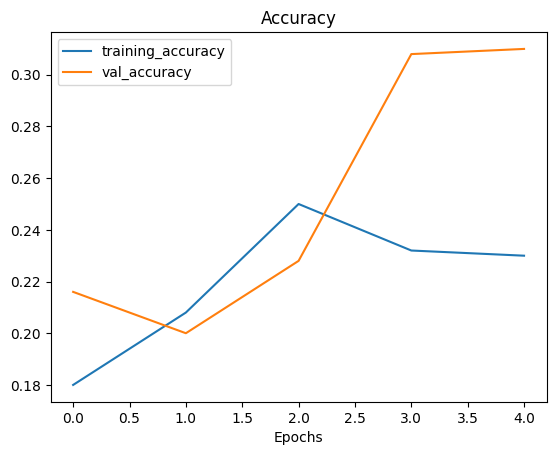

In [54]:
plot_loss_curves(history_3)

# CheckPoint and EarlyStopping

In [55]:
ckp = tf.keras.callbacks.ModelCheckpoint('MyCheckpoint.weights.h5',
                                          save_weights_only=True)
es = tf.keras.callbacks.EarlyStopping(restore_best_weights=True,
                                      patience=5,
                                      monitor='loss')

In [56]:
history_3 = model_3.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data),
                        callbacks=[ckp,es])

Epoch 1/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 109s 7s/step - accuracy: 0.2916 - loss: 1.5827 - val_accuracy: 0.3420 - val_loss: 1.5613
Epoch 2/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 108s 7s/step - accuracy: 0.2901 - loss: 1.5734 - val_accuracy: 0.3260 - val_loss: 1.5544
Epoch 3/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 108s 7s/step - accuracy: 0.2736 - loss: 1.5714 - val_accuracy: 0.3480 - val_loss: 1.5400
Epoch 4/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 109s 7s/step - accuracy: 0.2698 - loss: 1.5876 - val_accuracy: 0.3580 - val_loss: 1.5340
Epoch 5/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 125s 8s/step - accuracy: 0.2964 - loss: 1.5505 - val_accuracy: 0.3500 - val_loss: 1.5239


In [57]:
augmented_images.shape

(32, 224, 224, 3)

In [58]:
tf.expand_dims(augmented_labels,axis=0)

<tf.Tensor: shape=(1, 32, 5), dtype=float32, numpy=
array([[[0., 0., 0., 1., 0.],
        [1., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 1., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0.],
        [0., 1., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1.],
        [1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 1.],
        [1., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1.],
        [1., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0.],
        [1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1.],
        [0., 0., 1., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1.],
        [0., 0., 0

In [59]:
model_4 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32,
                           kernel_size=3,
                           activation='relu',
                           input_shape=(224, 224, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=2, padding='valid'),
    tf.keras.layers.Conv2D(filters=32,
                           kernel_size=3,
                           activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=2, padding='valid'),
    tf.keras.layers.Conv2D(filters=32,
                           kernel_size=3,
                           activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, padding='valid'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(5, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [60]:
optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4)
model_4.compile(loss='categorical_crossentropy',
                            optimizer=optimizer,
                            metrics=['accuracy'])

In [61]:
history_4 = model_4.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 76s 5s/step - accuracy: 0.2007 - loss: 3.5176 - val_accuracy: 0.1980 - val_loss: 1.6214
Epoch 2/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 79s 5s/step - accuracy: 0.2313 - loss: 2.7370 - val_accuracy: 0.2320 - val_loss: 1.6292
Epoch 3/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 75s 4s/step - accuracy: 0.2601 - loss: 2.4250 - val_accuracy: 0.2200 - val_loss: 1.6339
Epoch 4/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 80s 4s/step - accuracy: 0.2434 - loss: 2.2789 - val_accuracy: 0.2340 - val_loss: 1.6247
Epoch 5/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 91s 5s/step - accuracy: 0.2659 - loss: 2.0295 - val_accuracy: 0.2180 - val_loss: 1.6383


In [62]:
model_4.evaluate(test_data)

16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 782ms/step - accuracy: 0.2337 - loss: 1.6261


[1.6383237838745117, 0.21799999475479126]

# Transfer Learning

In [63]:
resnet_url = 'https://www.kaggle.com/models/google/resnet-v2/TensorFlow2/50-feature-vector/2'
efficientrel_url = "https://tfhub.dev/google/efficientnet/b0/feature-vector/1"

In [64]:
import tensorflow_hub as hub

IMAGE_SHAPE = (224,224)
def create_model(model_url, num_classes=5):
  feature_extraction_layer = hub.KerasLayer(model_url,
                                            trainable=False,
                                            name='Feature_extraction_layer',
                                            input_shape = IMAGE_SHAPE + (3, ))
  model = tf.keras.Sequential([
      tf.keras.layers.Lambda(lambda x: feature_extraction_layer(x)),
      tf.keras.layers.Dense(num_classes, activation='softmax', name='output_layer')
  ])
  return model

In [65]:
resnet_model = create_model(resnet_url,num_classes=train_data.num_classes)

In [66]:
resnet_model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lambda (Lambda)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [67]:
resnet_model.weights

[]

In [68]:
optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3)
resnet_model.compile(loss='categorical_crossentropy',
                     optimizer=optimizer,
                     metrics=['accuracy'])

In [69]:
resnet_history = resnet_model.fit(train_data_augmented,
                                  batch_size=32,
                                  epochs=5,
                                  steps_per_epoch=len(train_data_augmented),
                                  validation_data=train_data,
                                  validation_steps=len(test_data))

Epoch 1/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.2714 - loss: 1.6230

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


16/16 ━━━━━━━━━━━━━━━━━━━━ 147s 9s/step - accuracy: 0.2750 - loss: 1.6181 - val_accuracy: 0.5000 - val_loss: 1.2772
Epoch 2/5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


16/16 ━━━━━━━━━━━━━━━━━━━━ 160s 10s/step - accuracy: 0.5007 - loss: 1.2580 - val_accuracy: 0.5550 - val_loss: 1.1271
Epoch 3/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 136s 9s/step - accuracy: 0.6116 - loss: 1.0390 - val_accuracy: 0.6575 - val_loss: 1.0047
Epoch 4/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 142s 9s/step - accuracy: 0.6364 - loss: 1.0347 - val_accuracy: 0.7150 - val_loss: 0.8532
Epoch 5/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 142s 9s/step - accuracy: 0.6925 - loss: 0.9322 - val_accuracy: 0.6625 - val_loss: 0.8724


In [70]:
resnet_model.evaluate(test_data)

16/16 ━━━━━━━━━━━━━━━━━━━━ 72s 5s/step - accuracy: 0.6764 - loss: 0.9048


[0.8866748213768005, 0.6639999747276306]

In [71]:
resnet_model.layers

[<Lambda name=lambda, built=True>, <Dense name=output_layer, built=True>]

In [72]:
resnet_model.layers[0]

<Lambda name=lambda, built=True>

In [73]:
def plot_loss_curve(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']
  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs,loss,label='training_loss')
  plt.plot(epochs,val_loss,label='val_loss')
  plt.title('loss')
  plt.xlabel('epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs,accuracy,label='training_accuracy')
  plt.plot(epochs,val_accuracy,label='val_accuracy')
  plt.title('accuracy')
  plt.xlabel('Epochs')
  plt.legend()

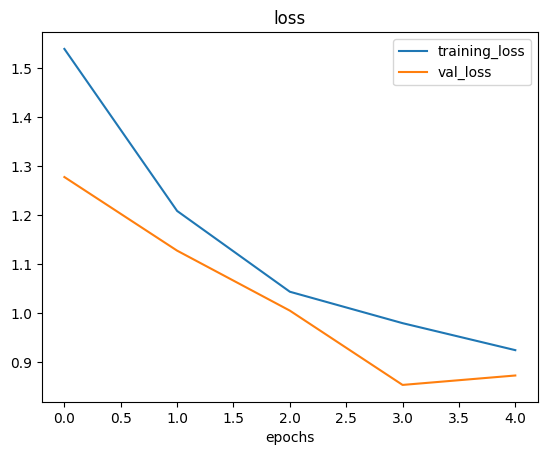

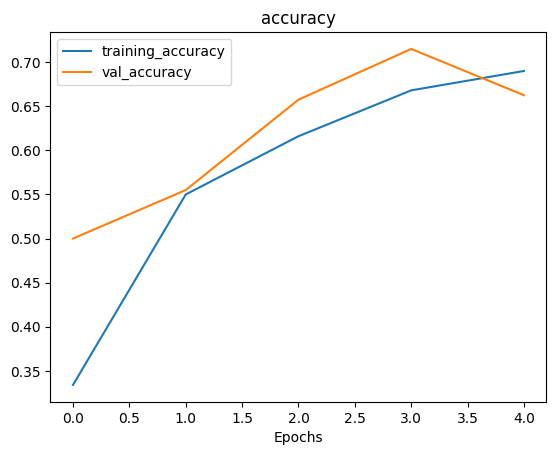

In [74]:
plot_loss_curve(resnet_history)

In [75]:
efficientrel_model = create_model(efficientrel_url, train_data.num_classes)

In [76]:
optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3)
efficientrel_model.compile(loss='categorical_crossentropy',
                           optimizer=optimizer,
                           metrics=['accuracy'])

In [77]:
efficientrel_history = efficientrel_model.fit(train_data_augmented,
                                              epochs=5,
                                              steps_per_epoch=len(train_data_augmented),
                                              validation_data=test_data,
                                              validation_steps=len(test_data))

Epoch 1/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 77s 5s/step - accuracy: 0.2407 - loss: 1.6487 - val_accuracy: 0.4420 - val_loss: 1.3695
Epoch 2/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 79s 4s/step - accuracy: 0.5282 - loss: 1.3218 - val_accuracy: 0.6720 - val_loss: 1.1397
Epoch 3/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 90s 5s/step - accuracy: 0.6623 - loss: 1.1405 - val_accuracy: 0.6820 - val_loss: 1.0173
Epoch 4/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 73s 4s/step - accuracy: 0.6908 - loss: 1.0104 - val_accuracy: 0.7140 - val_loss: 0.9115
Epoch 5/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 92s 5s/step - accuracy: 0.7386 - loss: 0.9105 - val_accuracy: 0.7300 - val_loss: 0.8531


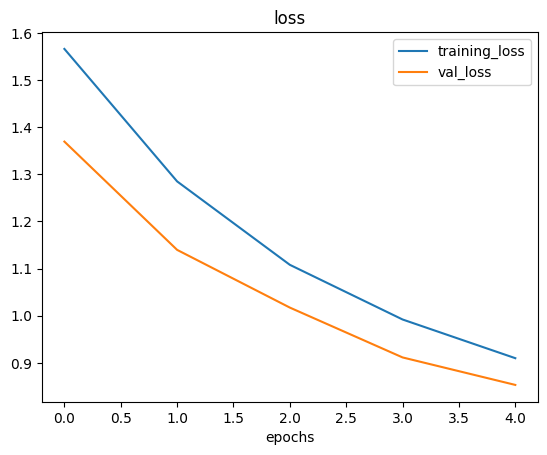

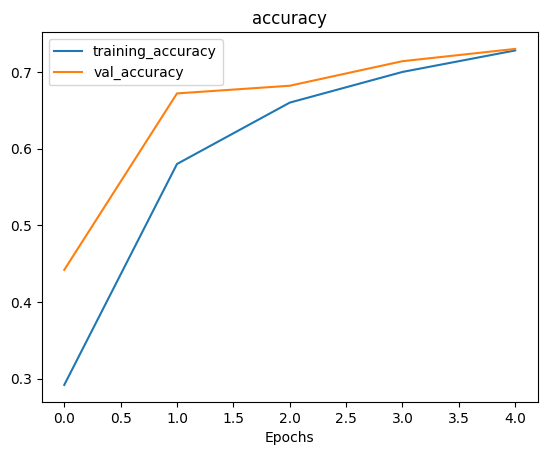

In [78]:
plot_loss_curve(efficientrel_history)

In [79]:
efficientrel_model.evaluate(test_data)

16/16 ━━━━━━━━━━━━━━━━━━━━ 32s 2s/step - accuracy: 0.7392 - loss: 0.8363


[0.853149950504303, 0.7300000190734863]

In [82]:
!wget https://raw.githubusercontent.com/databyhuseyn/DeepLearning/main/helper_functions.py
from helper_functions import create_tensorboard_callback,plot_loss_curves,unzip_data,walk_through_dir

--2025-04-08 15:41:53--  https://raw.githubusercontent.com/databyhuseyn/DeepLearning/main/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0.001s  

2025-04-08 15:41:53 (8.45 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [83]:
# Create base model with tf.keras.applications
base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)
base_model.trainable=False

inputs = tf.keras.layers.Input(shape=(224,224,3), name='input_layer')

x = base_model(inputs)
print(f'Shape after base_model:{x.shape}')

x = tf.keras.layers.GlobalAveragePooling2D(name='global_average_pooling_layer')(x)
print(f'Shape after GlobalAveragePooling2D: {x.shape}')

outputs = tf.keras.layers.Dense(5, activation='softmax', name='output_layer')(x)

model_0 = tf.keras.Model(inputs,outputs)

model_0.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

Shape after base_model:(None, 7, 7, 1280)
Shape after GlobalAveragePooling2D: (None, 1280)


In [84]:
history_0 = model_0.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=int(0.25 * len(test_data)),
                        callbacks=[create_tensorboard_callback('transfer_learning','grapevine_leaves_feature_extract')])

Saving TensorBoard log files to: transfer_learning/grapevine_leaves_feature_extract/20250408-154313
Epoch 1/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 60s 3s/step - accuracy: 0.2143 - loss: 1.6325 - val_accuracy: 0.2266 - val_loss: 1.6049
Epoch 2/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 76s 2s/step - accuracy: 0.1990 - loss: 1.6222 - val_accuracy: 0.2031 - val_loss: 1.6177
Epoch 3/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.2117 - loss: 1.6206 - val_accuracy: 0.2109 - val_loss: 1.6065
Epoch 4/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.1807 - loss: 1.6361 - val_accuracy: 0.2031 - val_loss: 1.6249
Epoch 5/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 81s 5s/step - accuracy: 0.1942 - loss: 1.6290 - val_accuracy: 0.1719 - val_loss: 1.6129


In [85]:
from tensorflow import keras
from tensorflow.keras import layers

In [86]:
data_augmentation = keras.Sequential([
    layers.Input(shape=(224,224,3)),
    layers.RandomFlip('horizontal'),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomHeight(0.2),
    layers.RandomWidth(0.2),
    # preprocessing.Rescaling(1./255) # keep for ResNet50V2, remove for EfficientNetV2B0
], name='data_augmentation')

In [87]:
def create_base_model(input_shape: tuple[int, int, int] = (224, 224, 3),
                      output_shape: int=5,
                      learning_rate: float=1e-3,
                      training: bool = False) -> tf.keras.Model:
    tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False).trainable = training

    inputs = layers.Input(shape=input_shape, name='input_layer')
    x = data_augmentation(inputs)
    x = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False, input_shape=x.shape[1:])(x, training=False) # pass augmented images to base model but keep it in inference mode
    x = layers.GlobalAveragePooling2D(name='global_average_pooling_layer')(x)
    outputs = layers.Dense(units=output_shape, activation='softmax',name='output_layer')(x)
    model = tf.keras.Model(inputs, outputs)

    model.compile(loss='categorical_crossentropy',
                  optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  metrics=['accuracy'])
    return model

model_2_with_base = create_base_model()

In [88]:
checkpoint_path = 'ten_percent_model_checkpoints_weights/checkpoint.ckpt.weights.h5'

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         save_weights_only=True, # set to False to save the entire model
                                                         save_best_only=True,  # save only the best model weights
                                                         save_freq='epoch',   # save every epoch
                                                         verbose=1)

In [90]:
initial_epochs = 5

history_grapvine_leaves_data_aug = model_2_with_base.fit(train_data_augmented,
                                          epochs=initial_epochs,
                                          validation_data=test_data,
                                          validation_steps=int(0.25 * len(test_data)), # do less steps per validation steps
                                          callbacks=[checkpoint_callback])

Epoch 1/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.3296 - loss: 1.4853
Epoch 1: val_loss improved from inf to 1.60207, saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt.weights.h5
16/16 ━━━━━━━━━━━━━━━━━━━━ 228s 9s/step - accuracy: 0.3354 - loss: 1.4761 - val_accuracy: 0.2031 - val_loss: 1.6021
Epoch 2/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.5833 - loss: 1.0446
Epoch 2: val_loss did not improve from 1.60207
16/16 ━━━━━━━━━━━━━━━━━━━━ 141s 9s/step - accuracy: 0.5849 - loss: 1.0410 - val_accuracy: 0.1250 - val_loss: 1.6270
Epoch 3/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.6611 - loss: 0.8600
Epoch 3: val_loss did not improve from 1.60207
16/16 ━━━━━━━━━━━━━━━━━━━━ 142s 9s/step - accuracy: 0.6623 - loss: 0.8597 - val_accuracy: 0.2344 - val_loss: 1.7850
Epoch 4/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.7782 - loss: 0.6270
Epoch 4: val_loss did not improve from 1.60207
16/16 ━━━━━━━━━━━━━━━━━━━━ 136s 9s/step - accuracy: 0.

In [92]:
images, labels = next(test_data)

results = model_2_with_base(images)
results

<tf.Tensor: shape=(32, 5), dtype=float32, numpy=
array([[0.26576102, 0.13172211, 0.29114705, 0.13158013, 0.17978966],
       [0.27532834, 0.141005  , 0.28218797, 0.12743574, 0.1740429 ],
       [0.2745831 , 0.12506449, 0.28218135, 0.13249353, 0.18567756],
       [0.26452208, 0.13152191, 0.28111476, 0.13610443, 0.18673687],
       [0.2749307 , 0.12978436, 0.28315783, 0.13211049, 0.18001677],
       [0.2669473 , 0.1304098 , 0.2845594 , 0.13463269, 0.18345071],
       [0.25540796, 0.13604088, 0.2890096 , 0.1370644 , 0.18247727],
       [0.26403636, 0.13083225, 0.28439516, 0.13565257, 0.18508369],
       [0.26662526, 0.12983784, 0.28130737, 0.1358246 , 0.18640496],
       [0.26863393, 0.13362963, 0.28338248, 0.13150592, 0.1828481 ],
       [0.26699543, 0.12820071, 0.28655326, 0.13275057, 0.18550014],
       [0.26810032, 0.12760736, 0.28137845, 0.13474245, 0.18817145],
       [0.26697347, 0.13002592, 0.28913236, 0.13183753, 0.18203062],
       [0.2573269 , 0.13518475, 0.2908277 , 0.13502392

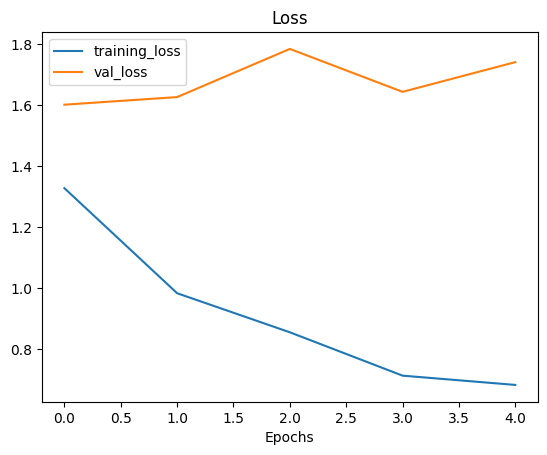

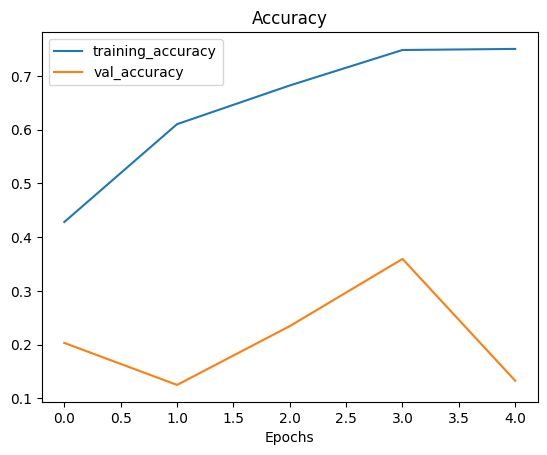

In [94]:
plot_loss_curves(history_grapvine_leaves_data_aug)

In [95]:
model_2_with_base.load_weights(checkpoint_path)
loadded_weights_model_result = model_2_with_base.evaluate(test_data)

16/16 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step - accuracy: 0.2001 - loss: 1.6123


In [96]:
results == loadded_weights_model_result

<tf.Tensor: shape=(), dtype=bool, numpy=False>

In [98]:
import numpy as np

loaded_weights_predictions = model_2_with_base.predict(images)
comparison_result = np.isclose(results, loaded_weights_predictions)
all_close = np.all(comparison_result)

print(f"Are all predictions close? {all_close}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
Are all predictions close? False


# Fine-Tuning

In [99]:
model_2_with_base.layers

[<InputLayer name=input_layer, built=True>,
 <Sequential name=data_augmentation, built=True>,
 <Functional name=efficientnetv2-b0, built=True>,
 <GlobalAveragePooling2D name=global_average_pooling_layer, built=True>,
 <Dense name=output_layer, built=True>]

In [100]:
for layer_number, layer in enumerate(model_2_with_base.layers):
  print(f'Layer number: {layer_number} | Layer name: {layer.name} | Trainable? {layer.trainable}')

Layer number: 0 | Layer name: input_layer | Trainable? True
Layer number: 1 | Layer name: data_augmentation | Trainable? True
Layer number: 2 | Layer name: efficientnetv2-b0 | Trainable? True
Layer number: 3 | Layer name: global_average_pooling_layer | Trainable? True
Layer number: 4 | Layer name: output_layer | Trainable? True


In [101]:
model_2_with_base.summary()

Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ data_augmentation (Sequential)       │ (None, None, None, 3)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ efficientnetv2-b0 (Functional)       │ (None, None, None, 1280)    │       5,919,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling_layer         │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 5)                   │           6,405 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,655,937 (67.35 MB)

 Trainable params: 5,865,109 (22.37 MB)

 Non-trainable params: 60,608 (236.75 KB)

 Optimizer params: 11,730,220 (44.75 MB)

In [102]:
model_2_base_model = model_2_with_base.layers[2]
model_2_base_model.name

'efficientnetv2-b0'

In [103]:
model_2_base_model.trainable = False

In [104]:
print(len(model_2_base_model.trainable_variables)) #layer at index 2 is the EfficientNetV2B0 layer

0


In [105]:
for layer_number, layer in enumerate(model_2.layers):
  print(layer_number, layer.name, layer.trainable)

0 conv2d_15 True
1 batch_normalization_10 True
2 max_pooling2d_15 True
3 conv2d_16 True
4 batch_normalization_11 True
5 max_pooling2d_16 True
6 conv2d_17 True
7 max_pooling2d_17 True
8 flatten_5 True
9 dropout_9 True
10 dense_9 True


In [106]:
model_2_base_model.trainable = True

for layer in model_2_base_model.layers[:-10]:
  layer.trainable = False

model_2.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
                metrics=['accuracy'])

In [107]:
for layer_number, layer in enumerate(model_2_base_model.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_layer_14 False
1 rescaling_3 False
2 normalization_3 False
3 stem_conv False
4 stem_bn False
5 stem_activation False
6 block1a_project_conv False
7 block1a_project_bn False
8 block1a_project_activation False
9 block2a_expand_conv False
10 block2a_expand_bn False
11 block2a_expand_activation False
12 block2a_project_conv False
13 block2a_project_bn False
14 block2b_expand_conv False
15 block2b_expand_bn False
16 block2b_expand_activation False
17 block2b_project_conv False
18 block2b_project_bn False
19 block2b_drop False
20 block2b_add False
21 block3a_expand_conv False
22 block3a_expand_bn False
23 block3a_expand_activation False
24 block3a_project_conv False
25 block3a_project_bn False
26 block3b_expand_conv False
27 block3b_expand_bn False
28 block3b_expand_activation False
29 block3b_project_conv False
30 block3b_project_bn False
31 block3b_drop False
32 block3b_add False
33 block4a_expand_conv False
34 block4a_expand_bn False
35 block4a_expand_activation False
36 block4a_d

In [108]:
print(len(model_2.trainable_variables))

12


In [109]:
fine_tune_epochs = initial_epochs + 5

history_fine_grapvine_leaves_data_aug = model_2.fit(train_data_augmented,
                                               epochs=fine_tune_epochs,
                                               validation_data=test_data,
                                               initial_epoch=history_grapvine_leaves_data_aug.epoch[-1],
                                               validation_steps=int(0.25 * len(test_data)))

Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 70s 4s/step - accuracy: 0.2897 - loss: 2.2599 - val_accuracy: 0.2266 - val_loss: 2.3404
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 82s 5s/step - accuracy: 0.3175 - loss: 1.8191 - val_accuracy: 0.1641 - val_loss: 2.4965
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 60s 4s/step - accuracy: 0.3007 - loss: 1.7426 - val_accuracy: 0.2188 - val_loss: 2.7626
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 81s 5s/step - accuracy: 0.3224 - loss: 1.6280 - val_accuracy: 0.2266 - val_loss: 3.3651
Epoch 9/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 59s 4s/step - accuracy: 0.3561 - loss: 1.5637 - val_accuracy: 0.2969 - val_loss: 3.1631
Epoch 10/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 82s 5s/step - accuracy: 0.3499 - loss: 1.5192 - val_accuracy: 0.2734 - val_loss: 3.9755


In [110]:
def compare_historys(original_history, new_history, initial_epochs=5):
    """
    Compares two model history objects.
    """
    acc = original_history.history["accuracy"]
    loss = original_history.history["loss"]

    print(len(acc))

    val_acc = original_history.history["val_accuracy"]
    val_loss = original_history.history["val_loss"]

    total_acc = acc + new_history.history["accuracy"]
    total_loss = loss + new_history.history["loss"]

    total_val_acc = val_acc + new_history.history["val_accuracy"]
    total_val_loss = val_loss + new_history.history["val_loss"]

    print(len(total_acc))
    print(total_acc)

    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(total_acc, label='Training Accuracy')
    plt.plot(total_val_acc, label='Validation Accuracy')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(2, 1, 2)
    plt.plot(total_loss, label='Training Loss')
    plt.plot(total_val_loss, label='Validation Loss')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.xlabel('epoch')
    plt.show()

5
11
[0.42800000309944153, 0.6100000143051147, 0.6819999814033508, 0.7480000257492065, 0.75, 0.29600000381469727, 0.2980000078678131, 0.3019999861717224, 0.3100000023841858, 0.33799999952316284, 0.36399999260902405]


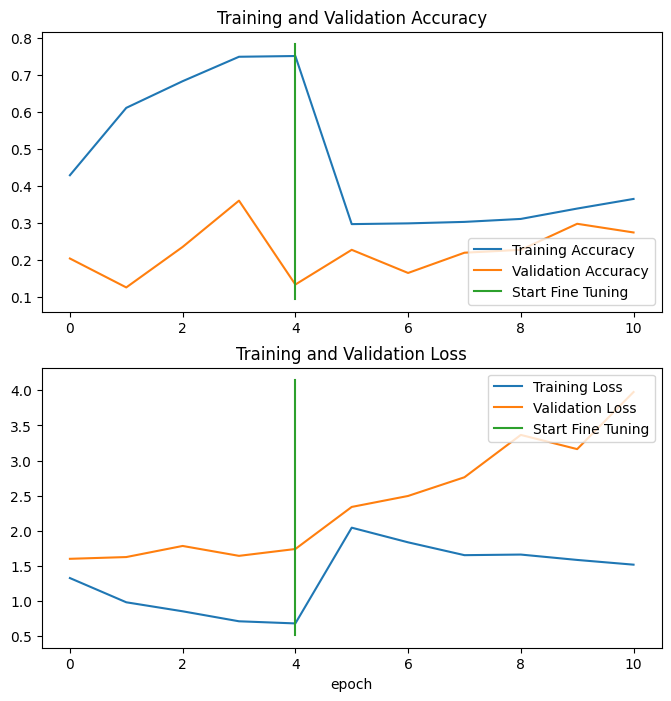

In [111]:
compare_historys(original_history=history_grapvine_leaves_data_aug,
                 new_history=history_fine_grapvine_leaves_data_aug,
                 initial_epochs=5);